# Principal Component Analysis

We use the PCA to find latent variables in a data set that describes the quality of wine. We shall compare how well a set of latent variables works in predicting the quality of wine against the original data set.

Refer https://www.kindsonthegenius.com/2019/01/12/principal-components-analysispca-in-python-step-by-step/

### Data set

The University of California, Irvine, (UCI) has an online repository of 325 data sets for machine learning exercises at
http://archive.ics.uci.edu/ml/
    
We use the Wine Quality data set for red wines created by P.Cortez, A. Cerdeira, F. Alemeida, T. Matos and J. Reis. Is has 1600 observations and 11 variables.

## Step 1 Import the necessary modules

In [1]:
import pandas      as        pd
import numpy       as        np
import seaborn     as        sns

from   sklearn               import    preprocessing
from   sklearn.preprocessing import    StandardScaler
from   sklearn.decomposition import    PCA
import matplotlib.pyplot     as        plt
from   scipy.stats           import    shapiro
from   scipy.stats           import    normaltest

from   factor_analyzer.factor_analyzer import calculate_kmo

%matplotlib inline

## Step 2: Obtain the Dataset

In [2]:
url   = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
#url   = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data  = pd.read_csv(url, sep = ";")

**Note: The first line specifies the url of the dataset, the second line loads the dataset into a dataframe data
(a dataframe is simply used to hold data).**

**pd.read_csv() is a function in pandas. The first argument is the path to the data, the second argument is the seperator used in the data set.**

In [3]:
X     = data[[u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', \
             u'total sulfur dioxide', u'density', u'pH', u'sulphates', 'alcohol']]
y     = data.quality

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Note**

In line 1, you create a data frame of independent variables by specifying the columns you need within double square bracket, []
In line 2, you create a series, y containing the dependent variable, *quality*

In [5]:
kmo_all, kmo_model = calculate_kmo(data)

threshold = 0.6
if kmo_model >= threshold:
    print('Sample adequacy is established')
else:
    print('Sample adequacy is not established')
    
print(kmo_model)

Sample adequacy is not established
0.46552868585830653


Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

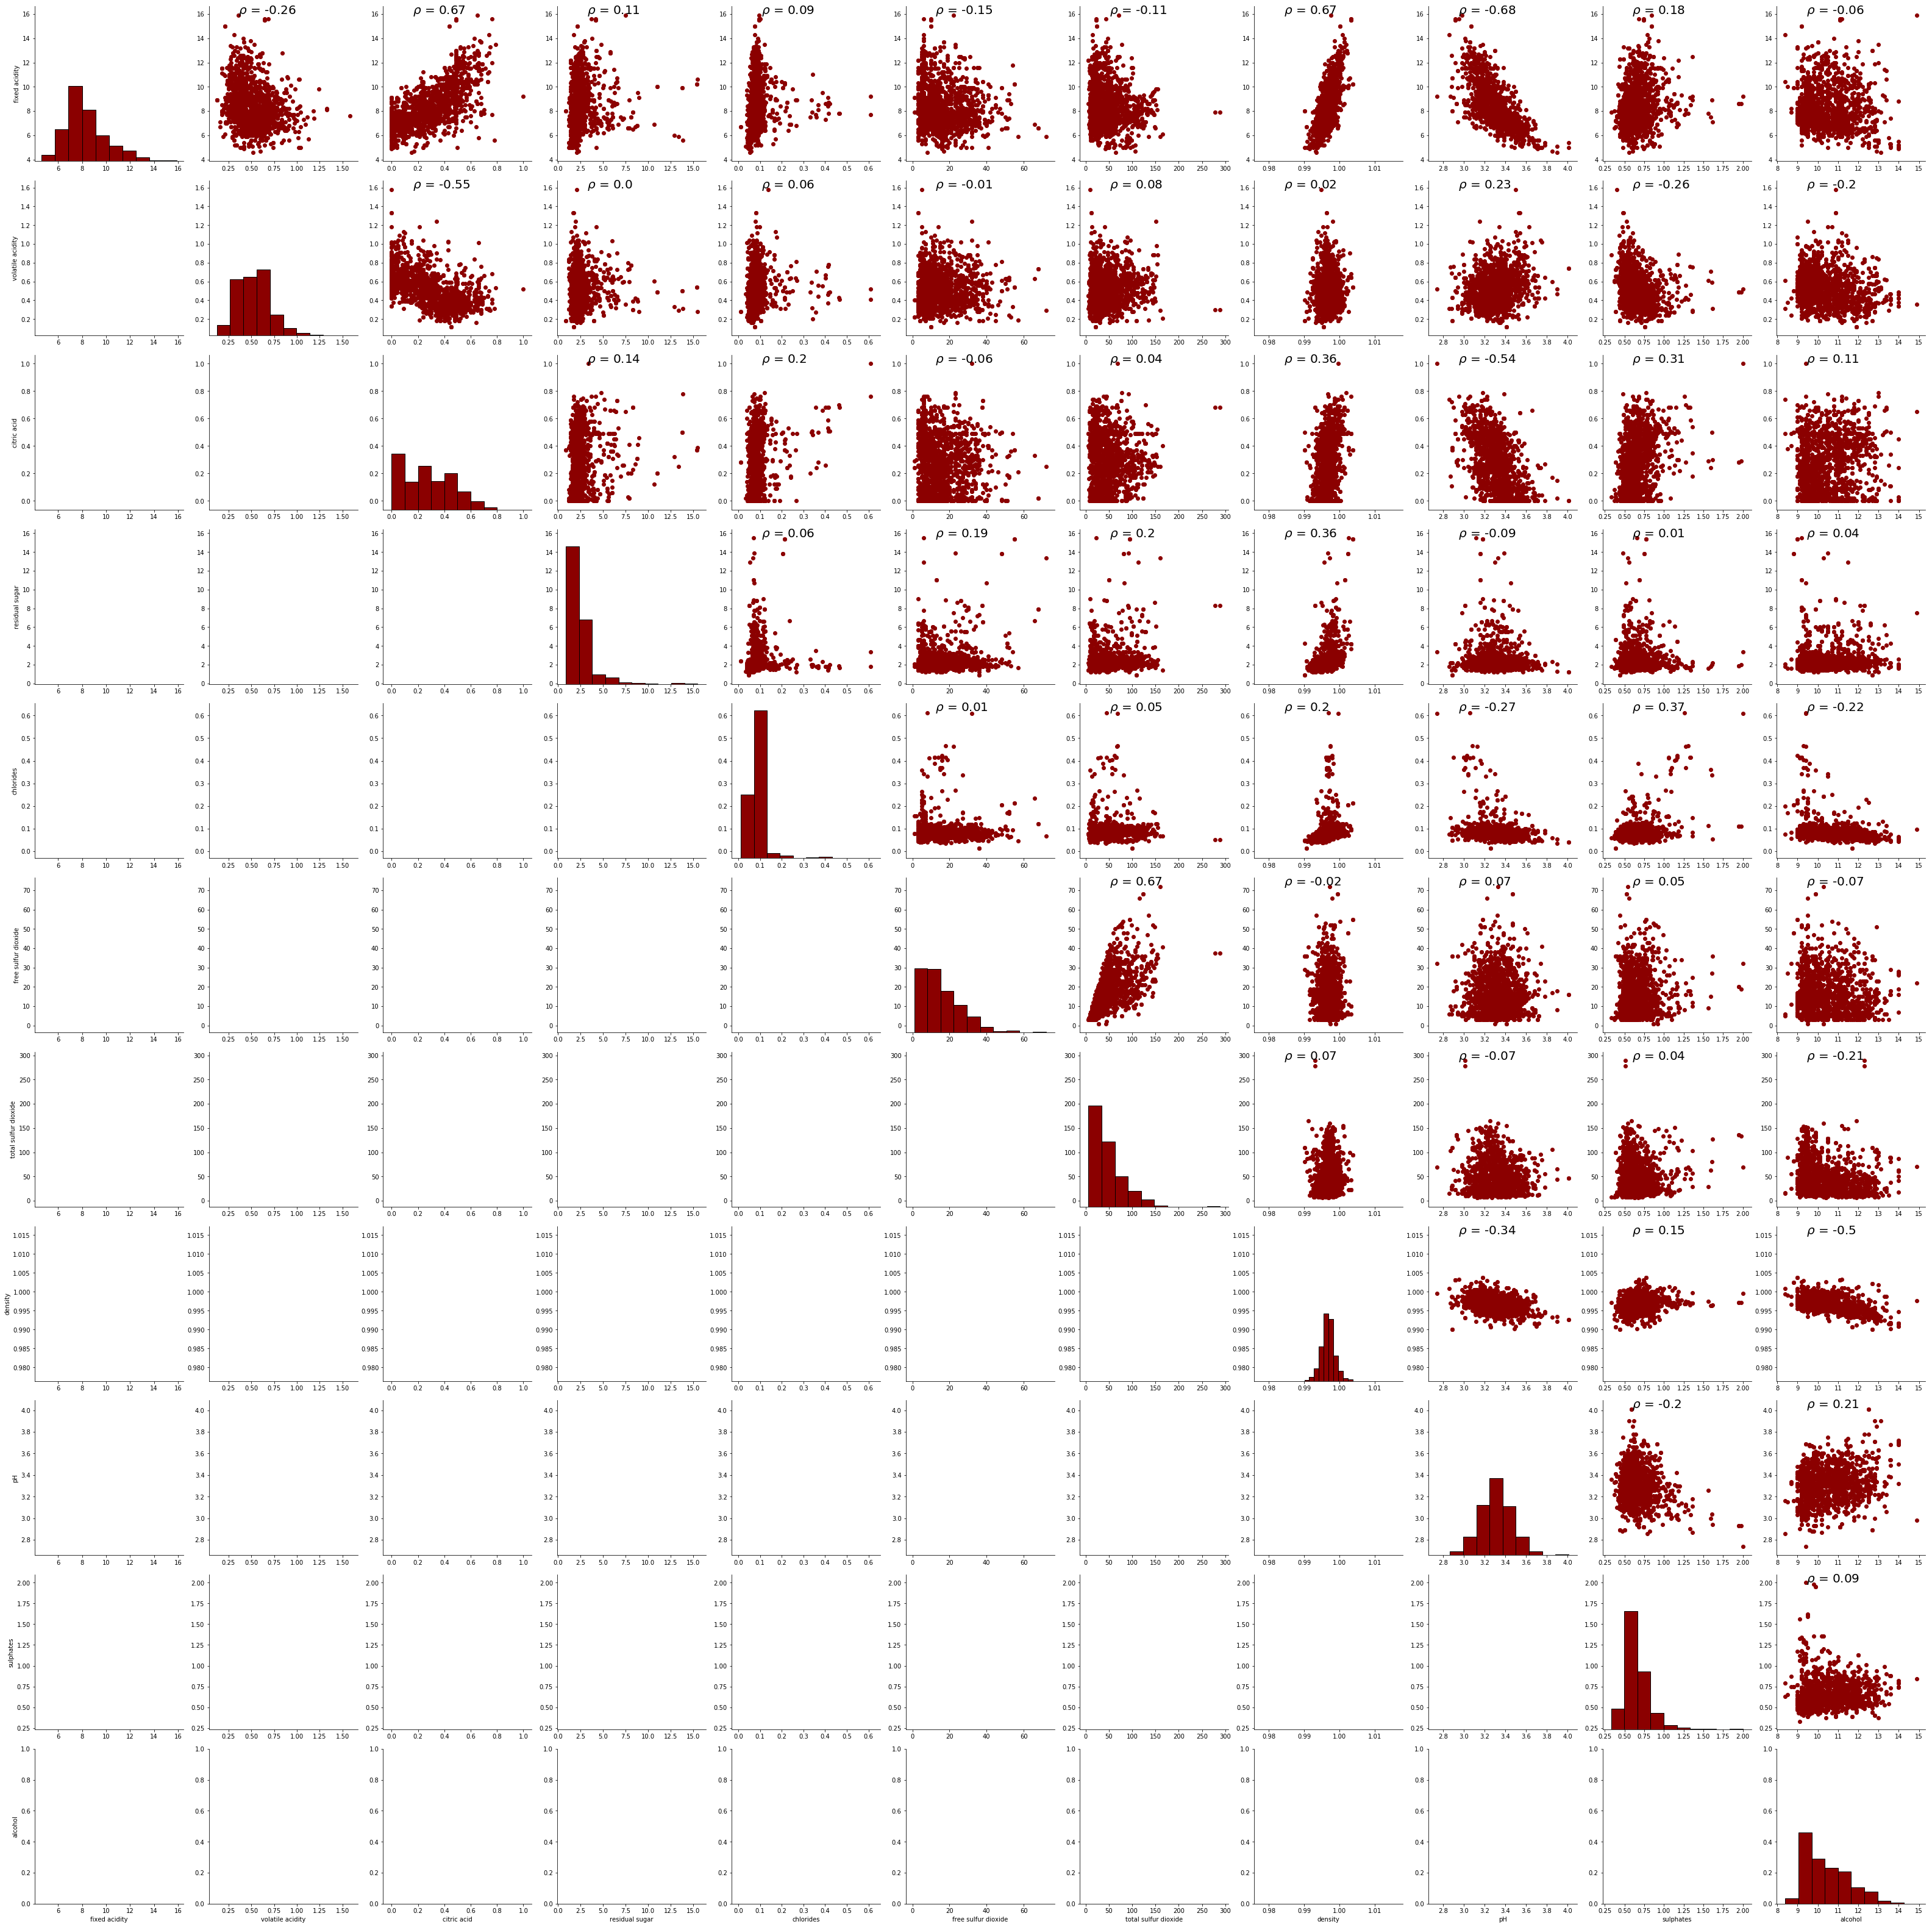

In [6]:
# Function to calculate correlation coefficient between two arrays

def corr(x, y, **kwargs):

    

    # Calculate the value

    coef = np.corrcoef(x, y)[0][1]

    # Make the label

    label = r'$\rho$ = ' + str(round(coef, 2))

    

    # Add the label to the plot

    ax = plt.gca()

    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

    

# Create a pair grid instance

grid = sns.PairGrid(data= X, vars = [u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', \
             u'total sulfur dioxide', u'density', u'pH', u'sulphates', 'alcohol'], size = 4)



# Map the plots to the locations

grid = grid.map_upper(plt.scatter, color = 'darkred')

grid = grid.map_upper(corr)

grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.26         0.67   
volatile acidity              -0.26              1.00        -0.55   
citric acid                    0.67             -0.55         1.00   
residual sugar                 0.11              0.00         0.14   
chlorides                      0.09              0.06         0.20   
free sulfur dioxide           -0.15             -0.01        -0.06   
total sulfur dioxide          -0.11              0.08         0.04   
density                        0.67              0.02         0.36   
pH                            -0.68              0.23        -0.54   
sulphates                      0.18             -0.26         0.31   
alcohol                       -0.06             -0.20         0.11   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                   0.11       0.09                -0.15   
volatile acidit

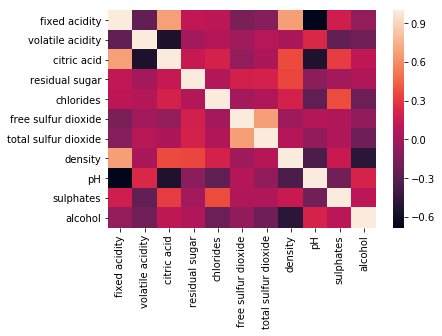

In [7]:
corr = X.corr()
print(round(corr,2).T)
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [8]:
# seed the random number generator
np.random.seed(1)
# normality test
stat, p = shapiro(X)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.491, p=0.000
Sample does not look Gaussian (reject H0)


D:\Python\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [9]:

# seed the random number generator
np.random.seed(1)

# normality test
stat, p = normaltest(X)
# interpret
alpha = 0.05
vars = [u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', \
             u'total sulfur dioxide', u'density', u'pH', u'sulphates', 'alcohol']

for i in range(len(p)):
    pval = p[i]
    print(' %d Variable %s' % (i+ 1, vars[i]), end = ": ")
    if pval > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

 1 Variable fixed acidity: Sample does not look Gaussian (reject H0)
 2 Variable volatile acidity: Sample does not look Gaussian (reject H0)
 3 Variable citric acid: Sample does not look Gaussian (reject H0)
 4 Variable residual sugar: Sample does not look Gaussian (reject H0)
 5 Variable chlorides: Sample does not look Gaussian (reject H0)
 6 Variable free sulfur dioxide: Sample does not look Gaussian (reject H0)
 7 Variable total sulfur dioxide: Sample does not look Gaussian (reject H0)
 8 Variable density: Sample does not look Gaussian (reject H0)
 9 Variable pH: Sample does not look Gaussian (reject H0)
 10 Variable sulphates: Sample does not look Gaussian (reject H0)
 11 Variable alcohol: Sample does not look Gaussian (reject H0)


## Step 3: Preview the data

In [10]:
print('\nFirst five rows of independent variable, X\n')
print(X.head(5).T) # Indpendent variables

print('\nFirst five rows of dependent variable, y\n')
print(y.head(5).T) # Dependent variables


First five rows of independent variable, X

                            0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000

First five rows of dependent variable, y

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


## Step 4: Scale the data

We need to center and scale the data so that the average value of each record would be 0 and the variance of each record would be 1.

We shall use StandardScaler available in sklearn.

In [11]:
x   =  StandardScaler().fit(X).transform(X)

Now we hold the scaled values in the variable, x.

## Step 5: Perform PCA

To perform PCA, we use PCA module from sklearn which we have already imported in step 1.

In [12]:
model   =  PCA()

### a. Find the number of components needed

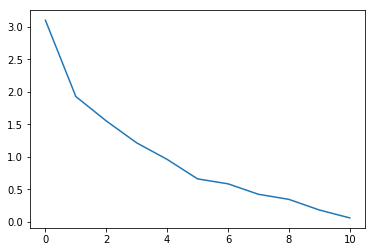

In [13]:
results =  model.fit(x)
plt.plot(results.explained_variance_)
plt.show()

The above graph indicates that a few variables can represent the majority of the information. 

###  b.Perform a Scree Plot of the Principal Components to visualize the cumulative % of variation explained by each component

In [14]:
percent_variance = np.cumsum(np.round(results.explained_variance_ratio_* 100, decimals =2))
columns          = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
percent_variance = list(np.round(percent_variance,2))
print(percent_variance)

[28.17, 45.68, 59.78, 70.81, 79.53, 85.53, 90.84, 94.69, 97.82, 99.47, 100.01]


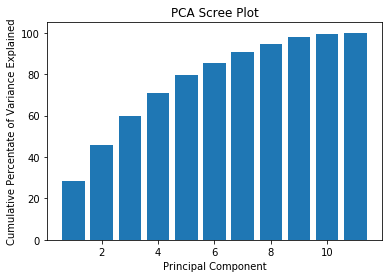

In [15]:
plt.bar(range(1, 12), percent_variance)
plt.ylabel('Cumulative Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

### Note

We observe that first 5 variables explain about 80% of the total information.

### c. Perform the PCA with the selected number of components

In [16]:
pca_5                  =  PCA(n_components = 5)

### ----------------------------------------------------------
### Compute and load the principal components into a dataframe
### -----------------------------------------------------------
pc                     =  pca_5.fit_transform(x)

### d. Form the matrix of variable loadings (i.e., a matrix whose columns contain the eigenvectors)

### How PCA calculates the 25 original variables' correlation with 6 latent variables?


In [17]:
pc_df                  =  pd.DataFrame()

pc_df['PC1']           =  results.components_[0].transpose()
pc_df['PC2']           =  results.components_[1].transpose()
pc_df['PC3']           =  results.components_[2].transpose()
pc_df['PC4']           =  results.components_[3].transpose()
pc_df['PC5']           =  results.components_[4].transpose()
pc_df.index          =  [u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', \
             u'total sulfur dioxide', u'density', u'pH', u'sulphates', 'alcohol']

In [21]:
pc_df

,PC1,PC2,PC3,PC4,PC5
fixed acidity,0.489314,-0.110503,-0.123302,-0.229617,-0.082614
volatile acidity,-0.238584,0.274930,-0.449963,0.078960,0.218735
citric acid,0.463632,-0.151791,0.238247,-0.079418,-0.058573
residual sugar,0.146107,0.272080,0.101283,-0.372793,0.732144
chlorides,0.212247,0.148052,-0.092614,0.666195,0.246501
free sulfur dioxide,-0.036158,0.513567,0.428793,-0.043538,-0.159152
total sulfur dioxide,0.023575,0.569487,0.322415,-0.034577,-0.222465
density,0.395353,0.233575,-0.338871,-0.174500,0.157077
pH,-0.438520,0.006711,0.057697,-0.003788,0.267530
sulphates,0.242921,-0.037554,0.279786,0.550872,0.225962


The rows in the above table, show the mathematical correlation. 

We have observed that the first latent variable, PC1 captures 28.17393128 % of the total information in the data set and the second latent variable, PC2 captues 17.50826991 % of the total information and so on by using the following formula:

PC1 = (fixed acidity * 0.489314) - (volatile acidity  * 0.238584) + (citric acid  * 0.463632) + 
      ( residual sugar * 0.146107) + (chlorides * 0.212247) - (free sulfur dioxide * 0.036158) +
      (total sulfur dioxide * 0.023575) + (density * 0.395353) - (pH * 0.438520) + 
      (sulphates * 0.242921) - (alcohol * 0.113232)

### e. Name each component

Giving a meaningful name for each component is very tricky and it requires domain knowledge. Let us attempt.

#### Let us find out how each component is composed of the original variables.

**The following variables have at least 45% correlation with the latent variable, PC1:**

1. fixed acidity

2. citric acid

**The following variables have at least 45% correlation with the latent variable, PC2:**

1. free sulfur dioxide

2. total sulfur dioxide

**The following variables have at least 45% correlation with the latent variable, PC3:**

1. volatile acidity

2. alcohol

**The following variables have at least 45% correlation with the latent variable, PC4:**

1. chlorides

2. sulphates

**The following variables have at least 45% correlation with the latent variable, PC5:**

1. residual sugar

We observe that the variables, density and pH are not classified into any of the components since their correlation with components is less than 45%.

So we name as follows:
* PC1 - Acidity tenacity
* PC2 - Toxic 
* PC3 - Smell and taste
* PC4 - Balancing fluids
* PC5 - Sweetness

### Let us recode the data in terms of the five latent variables, PC1 through PC5.

In [18]:
new_names = [ 'Acidity tenacity','Toxic', 'Smell and taste','Balancing fluids','Sweetness']

Z1         =  pca_5.fit(x)
Z          =  Z1.transform(x)

In [19]:
new_df    =  pd.DataFrame(Z, columns = new_names)

In [20]:
new_df.head(3)

,Acidity tenacity,Toxic,Smell and taste,Balancing fluids,Sweetness
0,-1.619530,0.450950,-1.774454,0.043740,0.067014
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531


### Observation

We observe high values for wine 0 in Smell and Taste, while wine 2 is high in Acidity tenacity. 

https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
https://www.kindsonthegenius.com/2019/01/12/principal-components-analysispca-in-python-step-by-step/
